In [1]:
import deeplake
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\Giorgia\anaconda3\envs\thesis\lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (3.2.18) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


# Import DATASET
## Adience
https://datasets.activeloop.ai/docs/ml/datasets/adience-dataset/

https://talhassner.github.io/home/projects/Adience/Adience-data.html

https://paperswithcode.com/dataset/adience

In [2]:
ds_path = 'C:/0_thesis/dataset/adience/'
csv_path = 'C:/0_thesis/dataset/'
filename_csv = 'adience-data.csv'

### Analysis: observe the balance in the dataset of gender, age

In [14]:
df = pd.read_csv(csv_path + filename_csv)
n_tot_images = df.shape[0]
df.head()

,filename,gender,age,filepath,age-group
0,0.jpg,female,"(8, 12)",C:/0_thesis/dataset/adience/0.jpg,NaN
1,1.jpg,male,"(0, 2)",C:/0_thesis/dataset/adience/1.jpg,NaN
2,2.jpg,male,"(0, 2)",C:/0_thesis/dataset/adience/2.jpg,NaN
3,3.jpg,male,"(0, 2)",C:/0_thesis/dataset/adience/3.jpg,NaN
4,4.jpg,male,"(8, 12)",C:/0_thesis/dataset/adience/4.jpg,NaN


In [15]:
n_tot_images

19370

In [ ]:
df.describe()

In [4]:
df.columns

Index(['filename', 'gender', 'age', 'filepath', 'age-group'], dtype='object')

### Gender

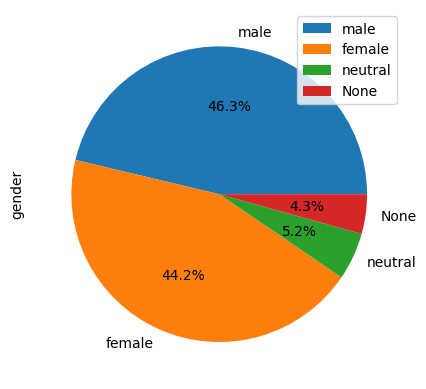

In [5]:
df['gender'].value_counts().plot.pie(autopct="%1.1f%%")
plt.legend()

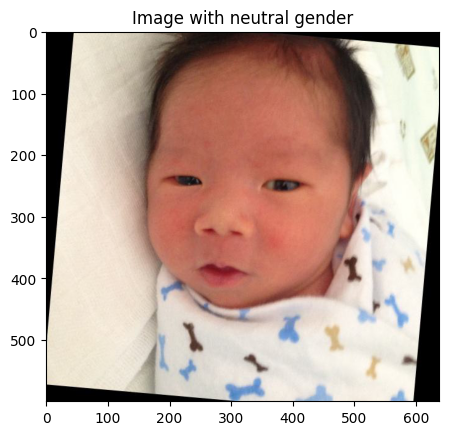

In [31]:
# example image with age range "None"
filepath_example_none_age = df.query("gender == 'neutral'").filepath[3964]
plt.title('Image with neutral gender')
plt.imshow(Image.open(filepath_example_none_age))

### Age

In [6]:
print("Range \t count")
df.age.value_counts()

Range 	 count


(25, 32)     5426
(38, 43)     2542
(0, 2)       2161
(8, 12)      2013
(4, 6)       1692
(15, 20)     1678
(60, 100)     943
(48, 53)      854
None          766
35            318
22            141
13            131
45            122
34            120
23            101
55             98
(27, 32)       76
(38, 42)       60
36             57
57             28
32             11
29              9
3               8
(38, 48)        6
2               3
56              2
42              1
46              1
58              1
(8, 23)         1
Name: age, dtype: int64

In [7]:
df.query("age == '(8, 23)'").filepath

1056    C:/0_thesis/dataset/adience/1056.jpg
Name: filepath, dtype: object

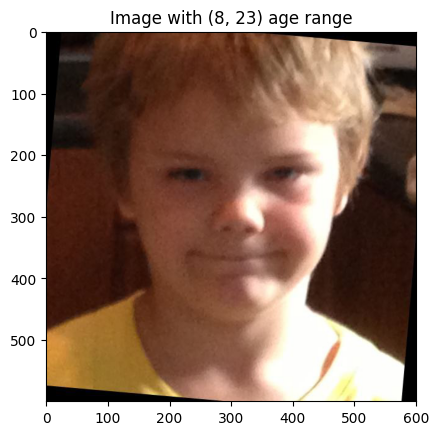

In [8]:
# only image "1056" is with range (8, 23) years
filepath_example_none_age = df.query("age == '(8, 23)'").filepath[1056]
plt.title('Image with (8, 23) age range')
plt.imshow(Image.open(filepath_example_none_age))

It seems he is less than 12 years so we add him to the appropriate range.

In [9]:
age_ranges_count = []
ages_list = ["(0, 2)", "2"]
age_ranges_count.append(len(df.query("age == @ages_list")))

ages_list = ["3", "(4, 6)", "(8, 12)", "(8, 23)"]
age_ranges_count.append(len(df.query("age == @ages_list")))

ages_list = ["13", "(15, 20)"]
age_ranges_count.append(len(df.query("age == @ages_list")))

ages_list = ["22", "23", "(25, 32)", "29", "32", "(27, 32)"] 
age_ranges_count.append(len(df.query("age == @ages_list")))

ages_list = ["34", "35", "(38, 43)", "(38, 42)", "36", "42", "(38, 48)"]
age_ranges_count.append(len(df.query("age == @ages_list")))

ages_list = ["45","(48, 53)", "46", "55", "56", "57", "58"] 
age_ranges_count.append(len(df.query("age == @ages_list")))

ages_list = ["(60, 100)"] 
age_ranges_count.append(len(df.query("age == @ages_list")))

ages_list = ["None"] # None
age_ranges_count.append(len(df.query("age == @ages_list")))

In [10]:
ranges = ["(0, 2)", "(3, 12)", "(13, 20)", "(21, 33)",
         "(34, 47)", "(48, 59)", "(60, 100)", "None"]

print("The percentage of images to the total in range ")
for i in range(len(ranges)):
    print(ranges[i],"years: ",round(age_ranges_count[i]/n_tot_images*100, 2),"%")

The percentage of images to the total in range 
(0, 2) years:  11.17 %
(3, 12) years:  19.17 %
(13, 20) years:  9.34 %
(21, 33) years:  29.76 %
(34, 47) years:  16.02 %
(48, 59) years:  5.71 %
(60, 100) years:  4.87 %
None years:  3.95 %


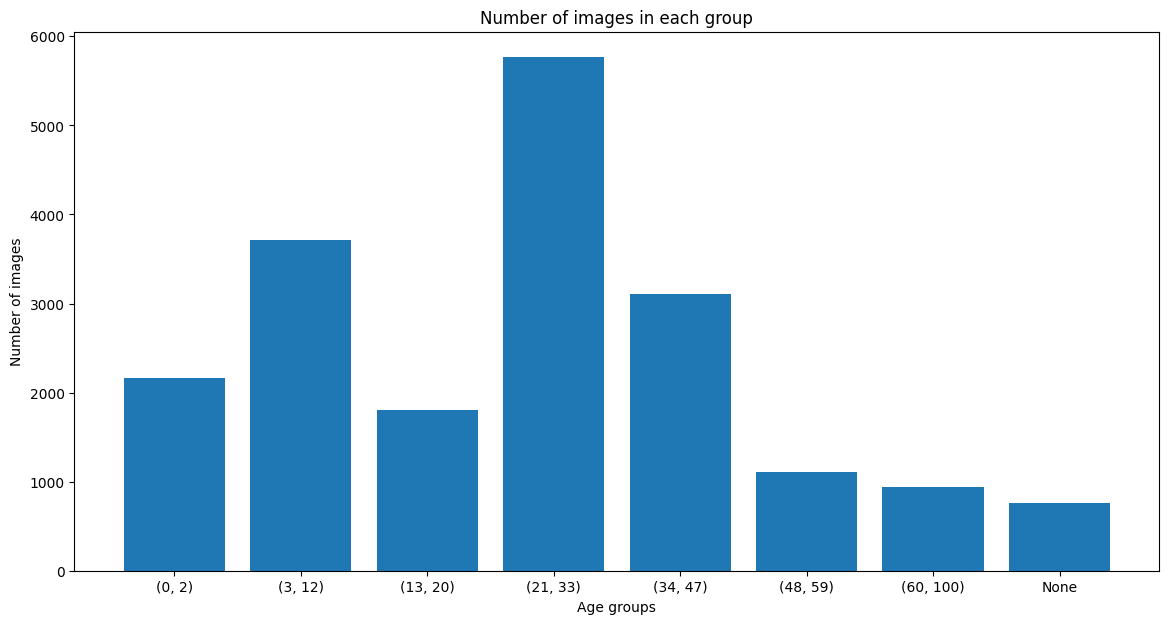

In [11]:
# Show a plot with the age distribution
x_pos = np.arange(len(age_ranges_count))
n_images = [age_ranges_count[i] for i in range(len(ranges))]
fig = plt.figure(dpi=100, figsize=(14, 7)) 
plt.bar(x_pos, n_images, align='center')
plt.xticks(x_pos, ranges)
plt.ylabel('Number of images')
plt.xlabel('Age groups')
plt.title('Number of images in each group')
plt.show()

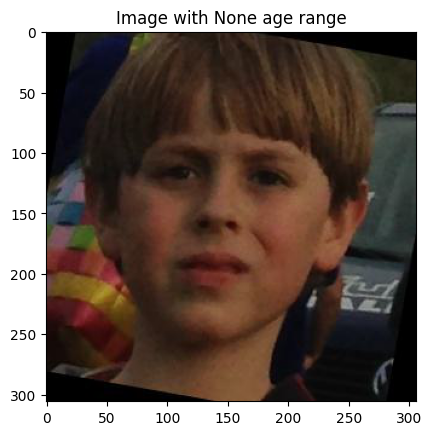

In [15]:
# example image with age range "None"
filepath_example_none_age = df.query("age == 'None'").filepath[2505]
plt.title('Image with None age range')
plt.imshow(Image.open(filepath_example_none_age))

In [19]:
# count images without a group: "None", "(38, 48)", "(8, 23)"
age_invalid_images = ["None", "(38, 48)", "(8, 23)"]
print("Number of images with invalid age range: ", len(df.query("age == @age_invalid_images")), " on ", n_tot_images, "images.")
print("Percentage of images with invalid age range: ", round(len(df.query("age == @age_invalid_images"))/n_tot_images*100, 2), " %.")

Number of images with invalid age range:  773  on  19370 images.
Percentage of images with invalid age range:  3.99  %.


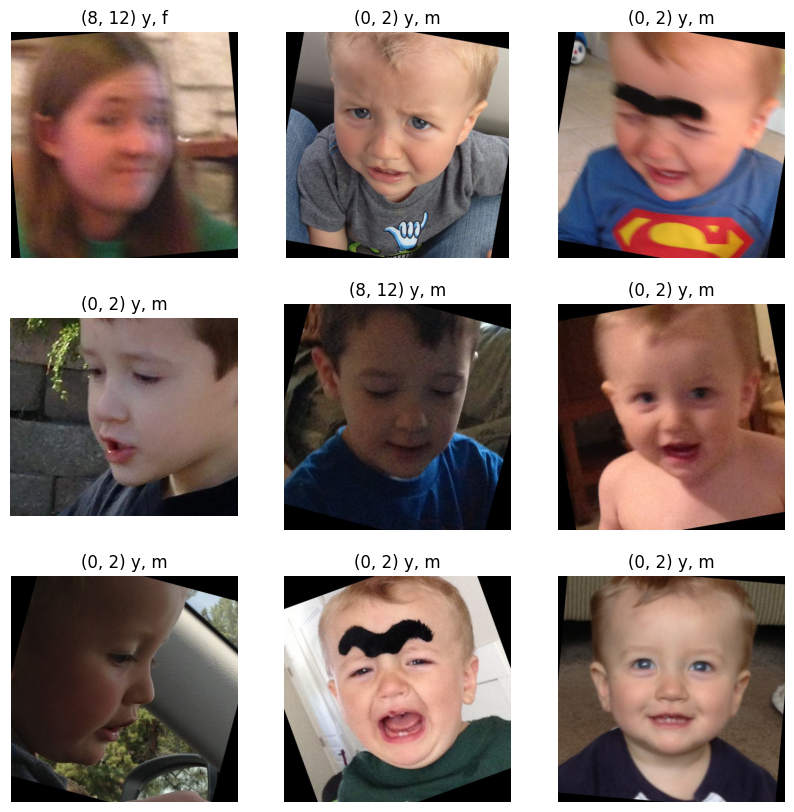

In [18]:
# show 9 example images
plt.figure(figsize=(10,10))
for i in range(9):
    sample = df.loc[i]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.title('%s y, %s' % (sample.age, sample.gender))
    plt.imshow(Image.open(sample.filepath))

#### Create DataFrame with only valid ages and genders

In [17]:
df_valid_age = df[df['age'] != 'None']
df_valid_age

,filename,gender,age,filepath,age-group
0,0.jpg,female,"(8, 12)",C:/0_thesis/dataset/adience/0.jpg,NaN
1,1.jpg,male,"(0, 2)",C:/0_thesis/dataset/adience/1.jpg,NaN
2,2.jpg,male,"(0, 2)",C:/0_thesis/dataset/adience/2.jpg,NaN
3,3.jpg,male,"(0, 2)",C:/0_thesis/dataset/adience/3.jpg,NaN
4,4.jpg,male,"(8, 12)",C:/0_thesis/dataset/adience/4.jpg,NaN
...,...,...,...,...,...
19365,19365.jpg,female,"(25, 32)",C:/0_thesis/dataset/adience/19365.jpg,NaN
19366,19366.jpg,female,"(25, 32)",C:/0_thesis/dataset/adience/19366.jpg,NaN
19367,19367.jpg,female,"(25, 32)",C:/0_thesis/dataset/adience/19367.jpg,NaN
19368,19368.jpg,female,"(25, 32)",C:/0_thesis/dataset/adience/19368.jpg,NaN


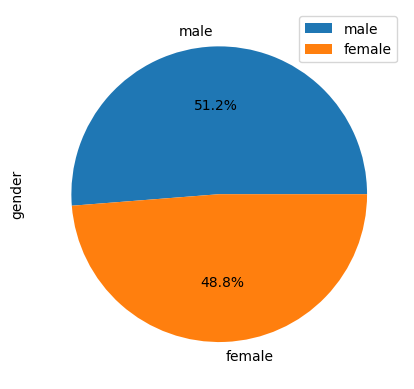

In [16]:
df_valid_gender = df_valid_age[(df_valid_age['gender'] == 'male') | (df_valid_age['gender'] == 'female')]
df_valid_gender['gender'].value_counts().plot.pie(autopct="%1.1f%%", labels=['male', 'female'])
plt.legend()

In [18]:
df_valid_gender

,filename,gender,age,filepath,age-group
0,0.jpg,female,"(8, 12)",C:/0_thesis/dataset/adience/0.jpg,NaN
1,1.jpg,male,"(0, 2)",C:/0_thesis/dataset/adience/1.jpg,NaN
2,2.jpg,male,"(0, 2)",C:/0_thesis/dataset/adience/2.jpg,NaN
3,3.jpg,male,"(0, 2)",C:/0_thesis/dataset/adience/3.jpg,NaN
4,4.jpg,male,"(8, 12)",C:/0_thesis/dataset/adience/4.jpg,NaN
...,...,...,...,...,...
19365,19365.jpg,female,"(25, 32)",C:/0_thesis/dataset/adience/19365.jpg,NaN
19366,19366.jpg,female,"(25, 32)",C:/0_thesis/dataset/adience/19366.jpg,NaN
19367,19367.jpg,female,"(25, 32)",C:/0_thesis/dataset/adience/19367.jpg,NaN
19368,19368.jpg,female,"(25, 32)",C:/0_thesis/dataset/adience/19368.jpg,NaN


In [19]:
df_final = df_valid_gender

df_final.to_csv(csv_path + filename_csv, index=False)

In [21]:
df_final

,filename,gender,age,filepath,age-group
0,0.jpg,female,"(8, 12)",C:/0_thesis/dataset/adience/0.jpg,NaN
1,1.jpg,male,"(0, 2)",C:/0_thesis/dataset/adience/1.jpg,NaN
2,2.jpg,male,"(0, 2)",C:/0_thesis/dataset/adience/2.jpg,NaN
3,3.jpg,male,"(0, 2)",C:/0_thesis/dataset/adience/3.jpg,NaN
4,4.jpg,male,"(8, 12)",C:/0_thesis/dataset/adience/4.jpg,NaN
...,...,...,...,...,...
19365,19365.jpg,female,"(25, 32)",C:/0_thesis/dataset/adience/19365.jpg,NaN
19366,19366.jpg,female,"(25, 32)",C:/0_thesis/dataset/adience/19366.jpg,NaN
19367,19367.jpg,female,"(25, 32)",C:/0_thesis/dataset/adience/19367.jpg,NaN
19368,19368.jpg,female,"(25, 32)",C:/0_thesis/dataset/adience/19368.jpg,NaN
